# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits 
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item() 
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}") 
    ```


---

## 3. Finetuning 

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**: 
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

### Eligimos un set de datos y lo traemos

In [1]:
from datasets import load_dataset, DownloadConfig
download_config = DownloadConfig(delete_extracted=True, download_desc=None)

In [2]:
dataset = load_dataset("Bingsu/Human_Action_Recognition")

print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['labels'].names)
print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 12600
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 5400
    })
})
{'image': Image(mode=None, decode=True, id=None), 'labels': ClassLabel(names=['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop'], id=None)}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x160 at 0x1BE15EF0E10>, 'labels': 11}
['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']
Tamaño del conjunto de entrenamiento: 12600
Tamaño del conjunto de prueba: 5400


In [3]:
train_dataset = dataset['train'].shuffle(seed=42).select(range(4000))
validation_dataset = dataset['train'].shuffle(seed=42).select(range(4000,5000))
test_dataset = dataset['train'].shuffle().select(range(5000,6000))

In [4]:
id2label = {id: label for id, label in enumerate(dataset['train'].features['labels'].names)}
label2id = {label: id for id, label in id2label.items()}
id2label

{0: 'calling',
 1: 'clapping',
 2: 'cycling',
 3: 'dancing',
 4: 'drinking',
 5: 'eating',
 6: 'fighting',
 7: 'hugging',
 8: 'laughing',
 9: 'listening_to_music',
 10: 'running',
 11: 'sitting',
 12: 'sleeping',
 13: 'texting',
 14: 'using_laptop'}

### Eligimos un modelo pre entrenado y lo traemos

Modelo MobileViT (small) entrenado en [ImageNet-1K](https://www.image-net.org/about.php) con una resolución de 256x256.

Fue presentado en el artículo ["MobileViT: Light-weight, General-purpose, and Mobile-friendly Vision Transformer" de Sachin Mehta & Mohammad Rastegari](https://arxiv.org/pdf/2110.02178). 

Se lanzó por primera vez en este repositorio [Link](https://github.com/apple/ml-cvnets)

In [5]:
from transformers import  MobileViTImageProcessor, MobileViTForImageClassification
import torch
import matplotlib.pyplot as plt
from PIL import Image
import random

In [6]:
feature_extractor = MobileViTImageProcessor.from_pretrained("apple/mobilevit-small", )
model = MobileViTForImageClassification.from_pretrained("apple/mobilevit-small", num_labels = len(id2label), id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True)

Some weights of MobileViTForImageClassification were not initialized from the model checkpoint at apple/mobilevit-small and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 640]) in the checkpoint and torch.Size([15, 640]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([15]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Ejecutamos el modelo sin ajustar en un ejemplo del dataset descargado

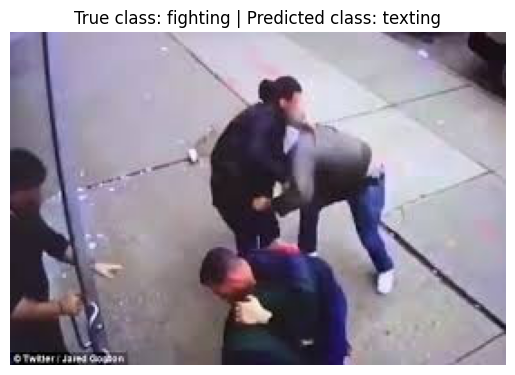

In [7]:
random_idx = random.randint(0,len(train_dataset))

inputs = feature_extractor(images=train_dataset[random_idx]['image'], return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_class_idx]

plt.imshow(train_dataset[random_idx]['image'])
plt.title(f"True class: {id2label[train_dataset[random_idx]['labels']]} | Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

### Finetuning

In [8]:
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

In [9]:
def preprocess_function(examples):
    examples['pixel_values'] = feature_extractor(examples['image'], return_tensors="pt")['pixel_values'].squeeze()
    return examples

train_dataset = train_dataset.map(preprocess_function)
validation_dataset = validation_dataset.map(preprocess_function)
test_dataset = test_dataset.map(preprocess_function)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [10]:
metric = evaluate.load("accuracy")

def compute_metrics(pred):
    logits, labels = pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [11]:
training_args = TrainingArguments(
    output_dir="./finetuned_models",
    eval_strategy="steps",
    learning_rate=2e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    save_steps=10,
    eval_steps=10,
    logging_steps=10,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics
)

Using auto half precision backend


In [12]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 4,000
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 375
  Number of trainable parameters = 4,947,247


Step,Training Loss,Validation Loss,Accuracy
10,2.679300,2.637274,0.225000
20,2.601100,2.542318,0.380000
30,2.526700,2.421335,0.412000
40,2.381800,2.316339,0.420000
50,2.285800,2.233844,0.422000
60,2.219500,2.126611,0.439000
70,2.034400,2.006305,0.467000
80,2.008700,1.896223,0.476000
90,1.933200,1.825554,0.478000
100,1.838600,1.761972,0.494000


The following columns in the evaluation set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1000
  Batch size = 32
Saving model checkpoint to ./finetuned_models\checkpoint-10
Configuration saved in ./finetuned_models\checkpoint-10\config.json
Model weights saved in ./finetuned_models\checkpoint-10\model.safetensors
The following columns in the evaluation set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1000
  Batch size = 32
Saving model checkpoint to ./finetuned_models\checkpoint-20
Configuration saved in ./finetuned_models\checkpoint-20\config.jso

TrainOutput(global_step=375, training_loss=1.5836522763570149, metrics={'train_runtime': 9694.3964, 'train_samples_per_second': 1.238, 'train_steps_per_second': 0.039, 'total_flos': 7.0032120348672e+16, 'train_loss': 1.5836522763570149, 'epoch': 3.0})

### Evaluation

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
outputs = trainer.predict(test_dataset)
print(outputs.metrics)

The following columns in the test set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


{'test_loss': 1.1650540828704834, 'test_accuracy': 0.672, 'test_runtime': 206.1289, 'test_samples_per_second': 4.851, 'test_steps_per_second': 0.155}


In [15]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
target_names = id2label.values()

In [16]:
print(classification_report(y_true, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

           calling       0.44      0.06      0.11        62
          clapping       0.65      0.51      0.57        65
           cycling       0.91      0.97      0.94        61
           dancing       0.68      0.82      0.74        62
          drinking       0.67      0.74      0.71        81
            eating       0.78      0.91      0.84        67
          fighting       0.76      0.78      0.77        65
           hugging       0.61      0.69      0.65        83
          laughing       0.69      0.79      0.73        61
listening_to_music       0.43      0.38      0.40        64
           running       0.73      0.78      0.75        67
           sitting       0.68      0.55      0.61        75
          sleeping       0.67      0.79      0.72        56
           texting       0.61      0.55      0.58        66
      using_laptop       0.56      0.78      0.65        65

          accuracy                    

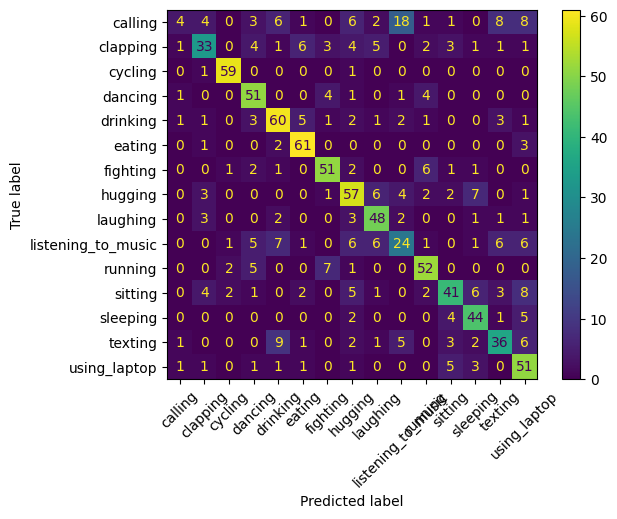

In [17]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(xticks_rotation=45)